# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import mplleaflet
import pandas as pd
import numpy as np


# def leaflet_plot_stations(binsize, hashid):

#     df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

#     station_locations_by_hash = df[df['hash'] == hashid]

#     lons = station_locations_by_hash['LONGITUDE'].tolist()
#     lats = station_locations_by_hash['LATITUDE'].tolist()

#     plt.figure(figsize=(8,8))

#     plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

#     return mplleaflet.display()

# leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [7]:
#Reading in data
df = pd.read_csv('C:/Users/markg/Documents/Python/UofM Course/datasets/Weatherdata.csv')
df.head()

mplleaflet?

In [6]:
# Defining function to generate values for plotting given year(s) and element from df. 

def get_values(df, element, year = None):
    if year == None:
        return print('ERROR: Must give two values for year')
    if type(year) != int:
        year_1, year_2 = year[0], year[1]
        
        result = (df[(df.Year.between(year_1, year_2)) & (df.Element == element)]
                      .groupby(['Month','Day'])['Data_Value']
                      .agg(Max = np.max, Min= np.min))
    else:
        result = (df[(df.Year == year) & (df.Element == element)]
                      .groupby(['Month','Day'])['Data_Value']
                      .agg(Max= np.max, Min= np.min))
        
    return result


In [7]:
# Max and Min of 2005-2015
min_b2015 = get_values(df, 'TMIN', year = [2005, 2014]).drop('Max', axis = 1)
max_b2015 = get_values(df, 'TMAX', year = [2005, 2014]).drop('Min', axis = 1)

# Max and Min of 2015
min_2015 = get_values(df, 'TMIN', year = 2015).drop('Max', axis = 1)
max_2015 = get_values(df, 'TMAX', year = 2015).drop('Min', axis = 1)

# Finding when 2015 was a record temp
new_min = np.where(min_2015['Min'].lt(min_b2015['Min']))[0]
new_max = np.where(max_2015['Max'].gt(max_b2015['Max']))[0]

# # Converting array into the days where the temp was broken (for the x coords)
min_x = min_2015.iloc[new_min]
max_x = max_2015.iloc[new_max]

max_roll = max_b2015.Max.rolling(10).mean()
min_roll = min_b2015.Min.rolling(10).mean()

# Dec looked empyt on graph, looks like there isn't data for everyday, so using the len to define x axis would look better
#len(max_b2015)

In [8]:
new_max[11] # Picking a Max point at random
max_2015.iloc[225].Max # Find the temp at that point (30)
new_min[3] # Picking a Min point at random
min_2015.iloc[35].Min # Find the temp at that point (-22)

-25.5

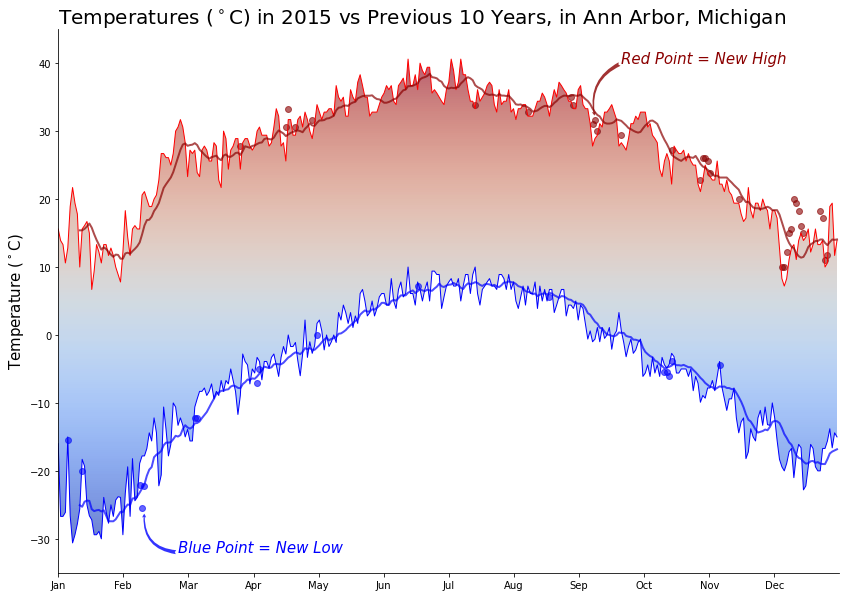

In [48]:
# Set up for Graph
fig = plt.figure(figsize = (14,10))
ax = plt.gca()
months = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')

# Max and Min lines
plt.plot(min_b2015.values, color = 'b', linewidth = 1)
plt.plot(max_b2015.values, color = 'r', linewidth = 1)
# Rolling Average line
plt.plot(max_roll.values, color = 'darkred', linewidth = 2, alpha = .7)
plt.plot(min_roll.values, color = 'blue', linewidth = 2, alpha = .7)
# Extreme Temp points from 2015
plt.scatter(new_min, min_x, color = 'blue', alpha = 0.6)
plt.scatter(new_max, max_x, color = 'darkred', alpha = 0.6)
# Filling between max and min
polygon = plt.gca().fill_between((range(len(min_b2015))), min_b2015.Min, max_b2015.Max,
                      facecolor = None, alpha = 0.1)
# Tidying up frame, ticks and labels
plt.xticks(np.arange(0,326,(326/12)), months)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Temperatures ($^\circ$C) in 2015 vs Previous 10 Years, in Ann Arbor, Michigan', size = 20, loc = 'left')
plt.ylabel('Temperature ($^\circ$C)', size = 15)
ax.axis([0,326, -35, 45])

# Arrows and labels
ax.annotate('', xy =(224,32), xycoords = 'data', 
            xytext = (235, 40), arrowprops = dict(arrowstyle = 'fancy',
                                                  connectionstyle = 'arc3,rad=0.4',
                                                  facecolor = 'darkred',
                                                  alpha = 0.8,
                                                  lw = 0) )
ax.text(s = 'Red Point = New High', x = 235 , y = 40, 
        size = 15, color = 'Darkred', style = 'italic')
ax.annotate('', xy =(36,-26), xycoords = 'data', 
            xytext = (50, -32), arrowprops = dict(arrowstyle = 'fancy',
                                                  connectionstyle = 'arc3,rad=-0.5',
                                                  facecolor = 'blue',
                                                  alpha = 0.8, 
                                                  lw = 0) )
ax.text(s = 'Blue Point = New Low', x = 50 , y = -32, 
        size = 15, color = 'blue', style = 'italic')

# Gradient
cm1 = 'coolwarm'

xlim = (x.min(), x.max())
ylim = plt.ylim()
verts = np.vstack([p.vertices for p in polygon.get_paths()])
gradient = plt.imshow(np.linspace(0, 1, 256).reshape(-1, 1), # Defines how smooth the gradient is
                      cmap=cm1, aspect='auto', origin='lower',
                      extent=[verts[:, 0].min(), verts[:, 0].max(), 
                              verts[:, 1].min(), verts[:, 1].max()],
                      alpha = 0.7) # Defines boundaries of fill

gradient.set_clip_path(polygon.get_paths()[0], transform=plt.gca().transData) # Clips fill to the two paths

plt.show()

#plt.savefig('C:/Users/markg/Documents/Python/UofM Course/graph.png')

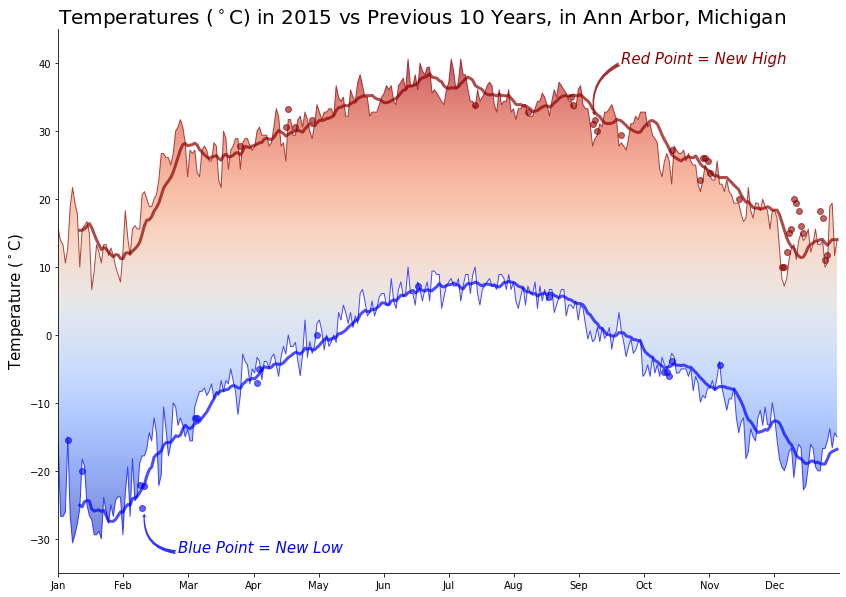

In [127]:
# Set up for Graph
fig = plt.figure(figsize = (14,10))
ax = plt.gca()
months = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
def graph():
    # Max and Min lines
    plt.plot(min_b2015.values, color = 'blue', linewidth = 1, alpha = .7)
    plt.plot(max_b2015.values, color = 'darkred', linewidth = 1, alpha = .7)
    # Rolling Average line
    plt.plot(max_roll.values, color = 'darkred', linewidth = 3, alpha = .7)
    plt.plot(min_roll.values, color = 'blue', linewidth = 3, alpha = .7)
    # Extreme Temp points from 2015
    plt.scatter(new_min, min_x, color = 'blue', alpha = 0.6)
    plt.scatter(new_max, max_x, color = 'darkred', alpha = 0.6)
    # Filling between max and min
    global polygon
    polygon = plt.gca().fill_between((range(len(min_b2015))), min_b2015.Min, max_b2015.Max,
                          facecolor = None, alpha = 0.0)
    # Tidying up frame, ticks and labels
    plt.xticks(np.arange(0,326,(326/12)), months)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.title('Temperatures ($^\circ$C) in 2015 vs Previous 10 Years, in Ann Arbor, Michigan', size = 20, loc = 'left')
    plt.ylabel('Temperature ($^\circ$C)', size = 15)
    ax.axis([0,326, -35, 45])

    # Arrows and labels
    ax.annotate('', xy =(224,32), xycoords = 'data', 
                xytext = (235, 40), arrowprops = dict(arrowstyle = 'fancy',
                                                      connectionstyle = 'arc3,rad=0.4',
                                                      facecolor = 'darkred',
                                                      alpha = 0.8,
                                                      lw = 0) )
    ax.text(s = 'Red Point = New High', x = 235 , y = 40, 
            size = 15, color = 'Darkred', style = 'italic')
    ax.annotate('', xy =(36,-26), xycoords = 'data', 
                xytext = (50, -32), arrowprops = dict(arrowstyle = 'fancy',
                                                      connectionstyle = 'arc3,rad=-0.5',
                                                      facecolor = 'blue',
                                                      alpha = 0.8, 
                                                      lw = 0) )
    ax.text(s = 'Blue Point = New Low', x = 50 , y = -32, 
            size = 15, color = 'blue', style = 'italic')
# Creating Base Graph
graph()    

# Gradient 1 - simplest but what if we always want blue at the bottom and red at the top, ie we always see the full range
cm1 = 'coolwarm'

xlim = (x.min(), x.max())
ylim = plt.ylim()
verts = np.vstack([p.vertices for p in polygon.get_paths()])
gradient = plt.imshow(np.linspace(0, 1, 256).reshape(-1, 1), # Defines how smooth the gradient is
                      cmap=cm1, aspect='auto', origin='lower',
                      extent=[verts[:, 0].min(), verts[:, 0].max(), 
                              verts[:, 1].min(), verts[:, 1].max()],
                      alpha = 0.7) # Defines boundaries of fill

gradient.set_clip_path(polygon.get_paths()[0], transform=plt.gca().transData) # Clips fill to the two paths

plt.show()


plt.show()
plt.close()
#plt.savefig('C:/Users/markg/Documents/Python/UofM Course/graph.png')

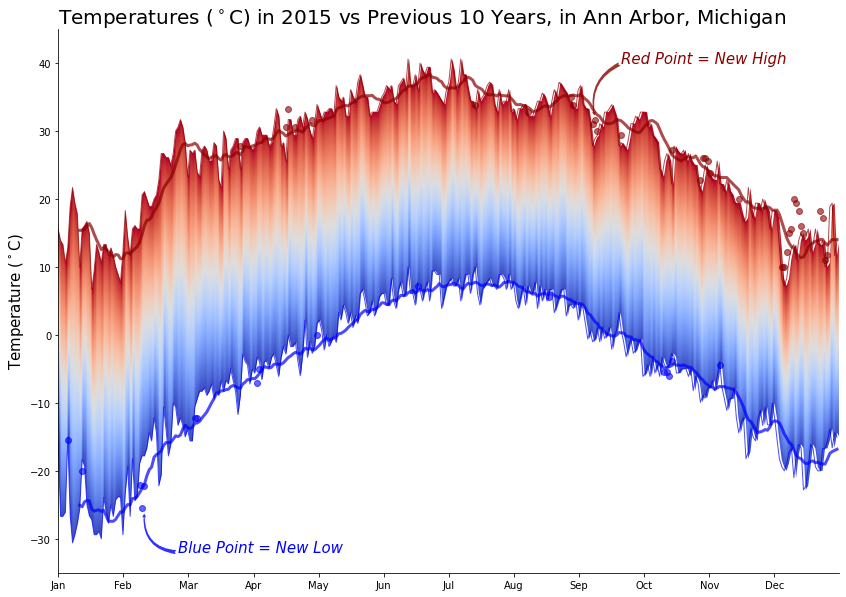

In [138]:
# Set up for Graph
fig = plt.figure(figsize = (14,10))
ax = plt.gca()
months = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
# Creating Base Graph
graph()

# Defining terms for the gradient
y2 = max_b2015.Max.values # to create an array of values
y1 = min_b2015.Min.values # to create an array of values
x = np.linspace(0, len(y1), len(y1))  # defines how wide the fill is, use len(y1) to fill completely dynamically

polygon = plt.fill_between(x, y1, y2, lw=0, color='none') # using fill_between to generate our polygon 
ylim = plt.ylim()
verts = np.vstack([p.vertices for p in polygon.get_paths()])  
ymin, ymax = verts[:, 1].min(), verts[:, 1].max()
gradient = plt.imshow(np.array([np.interp(np.linspace(ymin, ymax, len(y1)), [y1i, y2i], np.arange(2))
                                for y1i, y2i in zip(y1, y2)]).T,
                      cmap='coolwarm', aspect='auto', origin='lower', 
                      extent=[x.min(), x.max(), ymin, ymax])
gradient.set_clip_path(polygon.get_paths()[0], transform=plt.gca().transData) # setting the path of the gradient to the two paths from the polygon
plt.ylim(ylim)

plt.show()


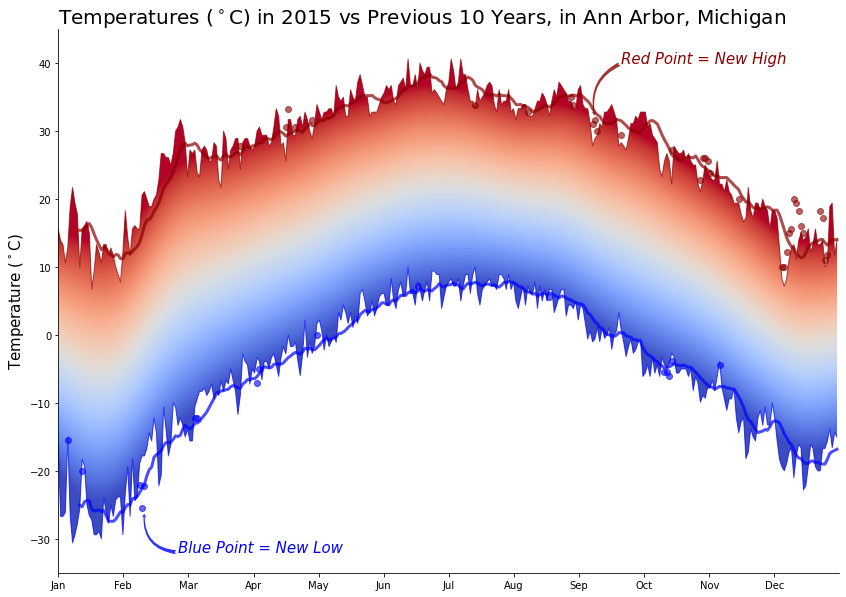

In [163]:
from scipy.ndimage import gaussian_filter

# Set up for Graph
fig = plt.figure(figsize = (14,10))
ax = plt.gca()
months = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')

graph()

gradient = plt.imshow(np.array([np.interp(np.linspace(ymin, ymax, 200), [y1i, y2i], [0,1])
                                for y1i, y2i in zip(gaussian_filter(y1, 10, mode='nearest'),
                                                    gaussian_filter(y2, 10, mode='nearest'))]).T,  # T for right orientation
                      cmap='coolwarm', aspect='auto', origin='lower', extent=[x.min(), x.max(), ymin, ymax])
gradient.set_clip_path(polygon.get_paths()[0], transform=plt.gca().transData)
plt.ylim(ylim)
plt.show()
plt.close()

In [164]:
np.array([np.interp(np.linspace(ymin, ymax, 200), # x coords where we interpolate
                    [y1i, y2i], # x coords of data points?
                    np.arange(2))  # y coords 0 - 1 
                    for y1i, y2i in zip(gaussian_filter(y1, 10, mode='nearest'),
                                        gaussian_filter(y2, 10, mode='nearest'))])



array([[0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])